# Exploratory Data Analysis

## Learning Objectives
1. Descriptive Statistics
2. GroupBy
3. ANOVA
4. Correlation
5. Correlation Statistics


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('automobile.csv', header=None)

headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", 
           "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", 
           "length", "width", "height", "curb-weight", "engine-type", 
           "num-of-cylinders", "engine-size", "fuel-system", "bore", 
           "stroke", "compression-ratio", "horsepower", "peak-rpm", 
           "city-mpg", "highway-mpg", "price"]

data.columns = headers
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [36]:
data.replace("?", pd.NA, inplace=True)
data.dropna(axis=0, inplace=True)

data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# Descriptive Statistics

In [37]:
# using Describe
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,10.161132,26.522013,32.081761
std,1.193086,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,3.889475,6.097142,6.459189
min,-2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,7.000000,15.000000,18.000000
25%,0.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,8.700000,23.000000,28.000000
50%,1.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,9.000000,26.000000,32.000000
75%,2.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,9.400000,31.000000,37.000000
max,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,23.000000,49.000000,54.000000


Text(0, 0.5, 'Price')

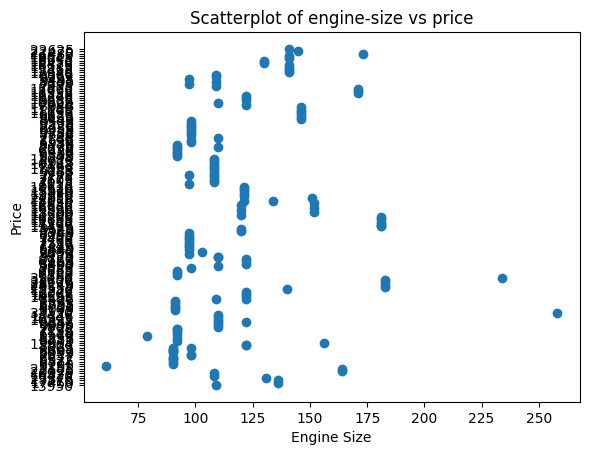

In [38]:
y = data["price"]
x = data["engine-size"]
plt.scatter(x,y)
plt.title("Scatterplot of engine-size vs price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

# Group By

Is there a relationship between different types of 'drive systems' and the price of the vechiles ? 

In [39]:
df_test = data[['drive-wheels', 'body-style', 'price']]

df_test['price'] = pd.to_numeric(df_test['price'], errors='coerce')

df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
print(df_grp)

   drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd      hardtop   8249.000000
4           fwd    hatchback   7989.800000
5           fwd        sedan   9558.120000
6           fwd        wagon   8829.222222
7           rwd  convertible  26362.500000
8           rwd      hardtop  14365.750000
9           rwd    hatchback  14918.500000
10          rwd        sedan  18318.576923
11          rwd        wagon  19282.000000


C:\Users\Levin\AppData\Local\Temp\ipykernel_13328\1443175778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['price'] = pd.to_numeric(df_test['price'], errors='coerce')


In [40]:
# using pivot to visualize group by
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
df_pivot

price                                                
body-style   convertible   hardtop hatchback         sedan         wagon
drive-wheels                                                            
4wd                  NaN       NaN    7603.0  12647.333333   9095.750000
fwd                  NaN   8249.00    7989.8   9558.120000   8829.222222
rwd              26362.5  14365.75   14918.5  18318.576923  19282.000000

C:\Users\Levin\AppData\Local\Temp\ipykernel_13328\153894509.py:3: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


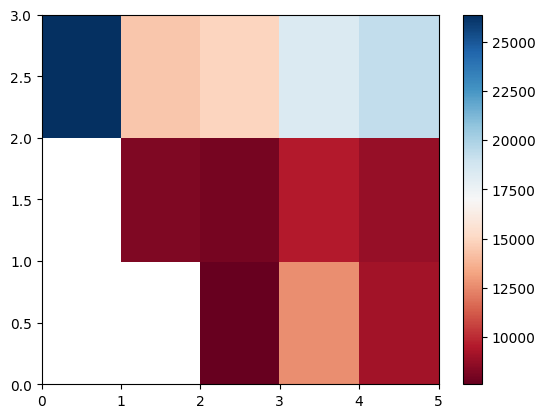

In [41]:
# plot with heatmap
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()